In [16]:
import pandas as pd
import seaborn as sn
import nearest_neighbors as nn
import cross_validation as cross_val
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist.data
y = mnist.target.astype(int)
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=True, random_state=42)

In [5]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=3000,train_size=10000, shuffle=True, random_state=42)

## Задание №1

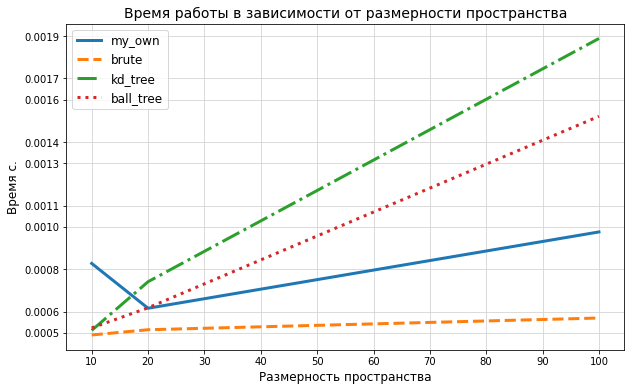

In [28]:
num_features = [10, 20, 100]
select_features = [np.random.choice(np.arange(784), i, replace=False) for i in num_features]

strategy = ["my_own", "brute", "kd_tree", "ball_tree"]
metric = "euclidean"

time = np.zeros((len(strategy), len(num_features)))

ls = ["-", "--", "-.", ":"]
plt.figure(figsize=(10, 6))
for i, strat in enumerate(strategy):
    model = nn.KNNClassifier(5, strategy=strat, metric=metric)
    for j, f in enumerate(select_features):
        model.fit(X_train_t[:, f], y_train_t)
        t = %timeit -q -o -n 20 model.find_kneighbors(X_test_t[:, f])
        time[i][j] = t.average
    plt.plot(num_features, time[i], label=strat, ls=ls[i],lw=3)
    
plt.ylabel("Время с.", size=12)
plt.xlabel("Размерность пространства", size=12)
plt.yticks(np.linspace(time.min(), time.max(), 10).round(4))
plt.xticks(np.arange(10, 101, 10))
plt.title("Время работы в зависимости от размерности пространства", size=14)
plt.grid(True, color="lightgrey")
plt.legend(fontsize=12)
plt.show()

## Задание №2/№3

eucliean, weight: False
cosine, weight: False
eucliean, weight: True
cosine, weight: True


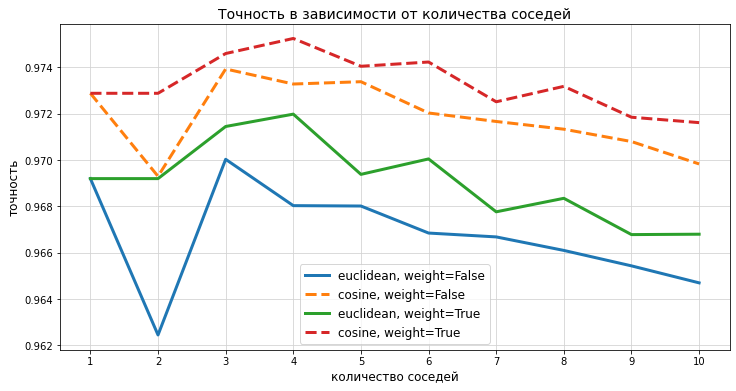

In [7]:
rg = np.arange(1, 11)
plt.figure(figsize=(12, 6))

for w in [False, True]:
    str_w = "True" if w else "False"
    acc = cross_val.knn_cross_val_score(X_train, y_train, k_list=rg,
                                        cv=cross_val.kfold(X_train.shape[0], 3),
                                        strategy="brute", weights=w)
    plt.plot(rg, [sum(x[1])/len(x[1])for x in acc.items()],
             ls="-",label="euclidean, weight="+str_w,lw=3)
    print("eucliean, weight:",str_w)
    acc = cross_val.knn_cross_val_score(X_train, y_train, k_list=rg,
                                        cv=cross_val.kfold(X_train.shape[0], 3),
                                        metric="cosine", weights=w,test_block_size=300)
    plt.plot(rg, [sum(x[1])/len(x[1])for x in acc.items()],
             ls="--", label="cosine, weight="+str_w,lw=3)
    print("cosine, weight:",str_w)
plt.xticks(range(1, 11))
plt.xlabel("количество соседей", size=12)
plt.ylabel("точность", size=12)
plt.title("Точность в зависимости от количества соседей", size=14)
plt.grid(True, color="lightgrey")
plt.legend(fontsize=12)
plt.show()

In [42]:
model_time_euc = nn.KNNClassifier(3, metric="euclidean", test_block_size=500)
model_time_cosine = nn.KNNClassifier(3, metric="cosine", test_block_size=500)
model_time_euc.fit(X_train_t, y_train_t)
model_time_cosine.fit(X_train_t, y_train_t)

time_euclidean = %timeit -q -o model_time_euc.predict(X_test_t)
time_coisne = %timeit -q -o model_time_cosine.predict(X_test_t)

In [43]:
time_euclidean.average,time_coisne.average

(0.13005783278570757, 0.12119263434286234)

## Задание №4

In [6]:
best_model = nn.KNNClassifier(4, metric = "cosine", weights=True, test_block_size=500)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
(y_pred==y_test).mean()

0.9771

In [8]:
from sklearn.metrics import confusion_matrix

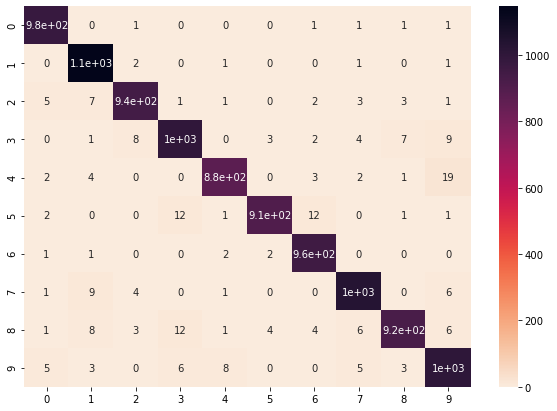

In [57]:
cm = confusion_matrix(y_test,y_pred,labels=range(10))
df_cm = pd.DataFrame(cm, range(10), range(10))

plt.figure(figsize=(10,7))
sn.heatmap(df_cm,annot=True, cmap="rocket_r")

2 0 5


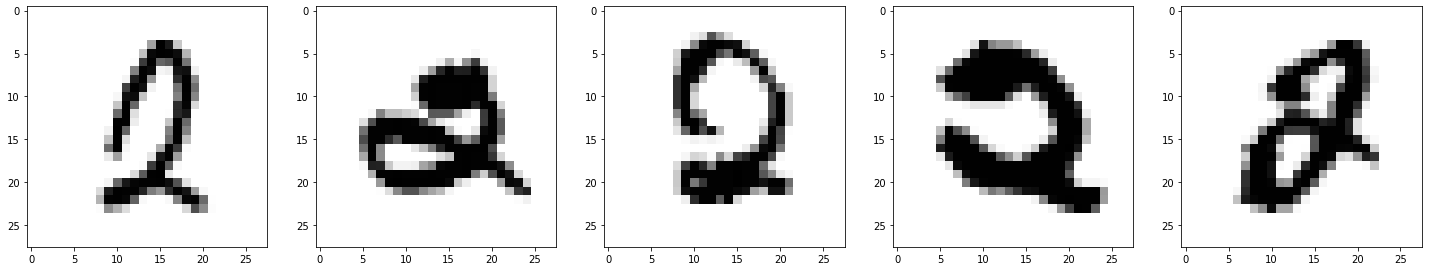

2 1 7


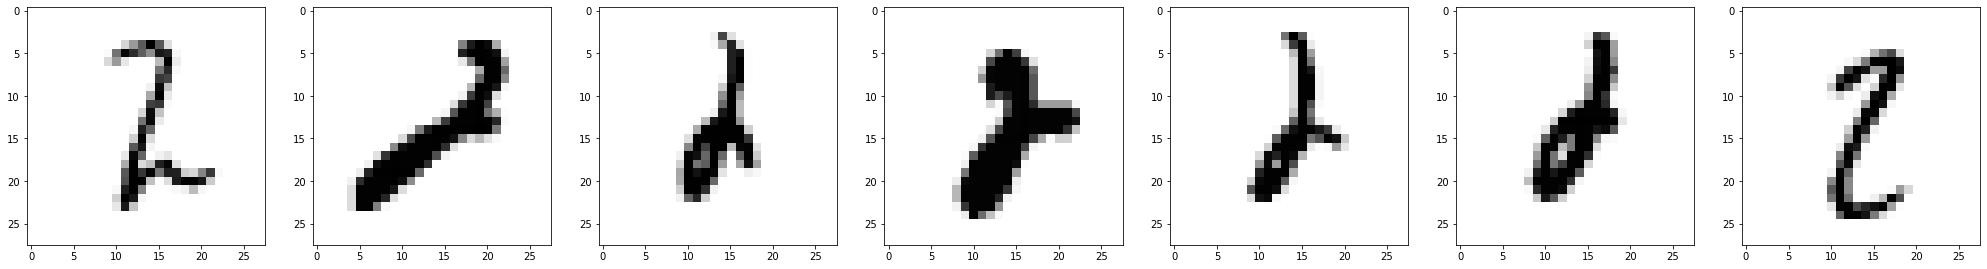

3 2 8


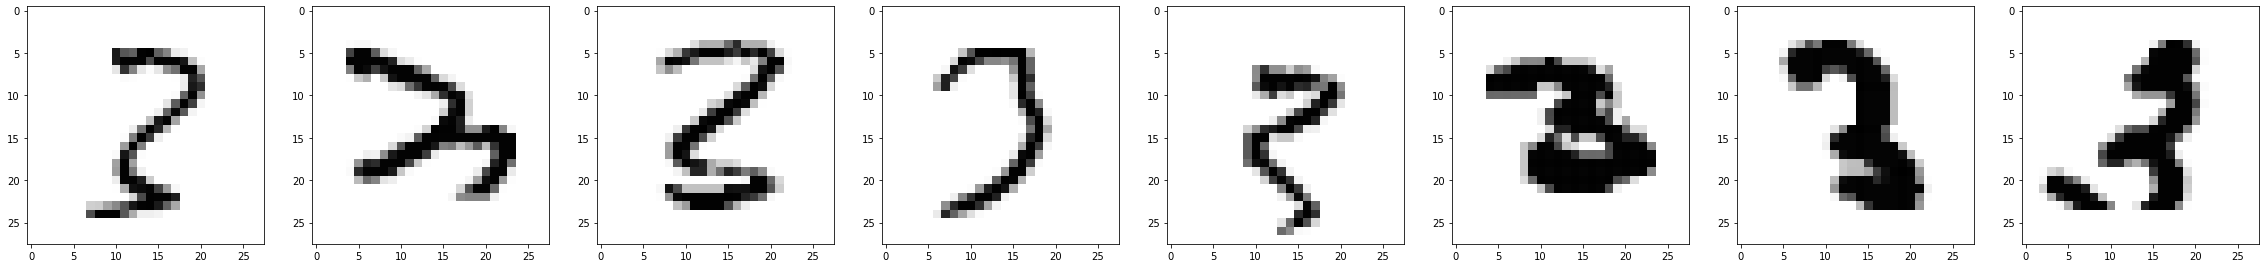

3 8 7


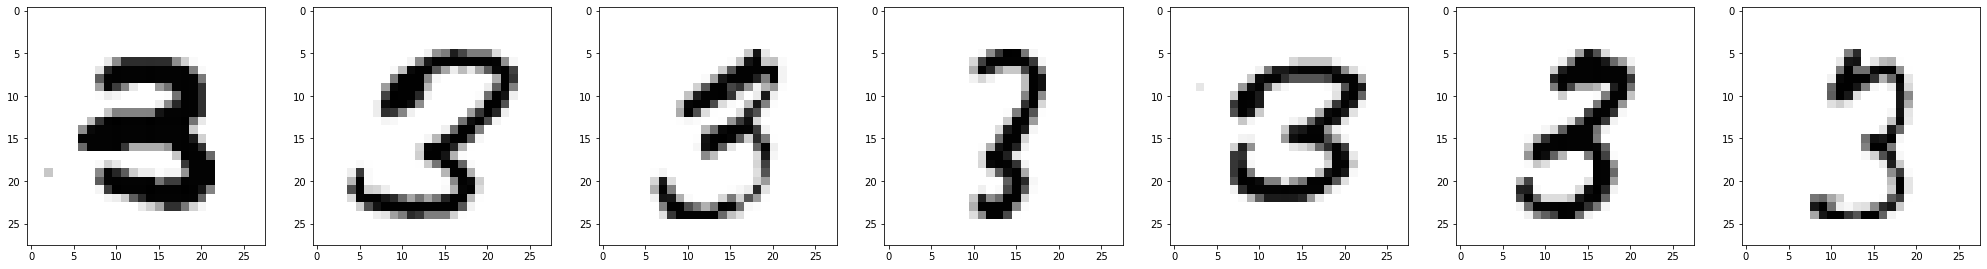

3 9 9


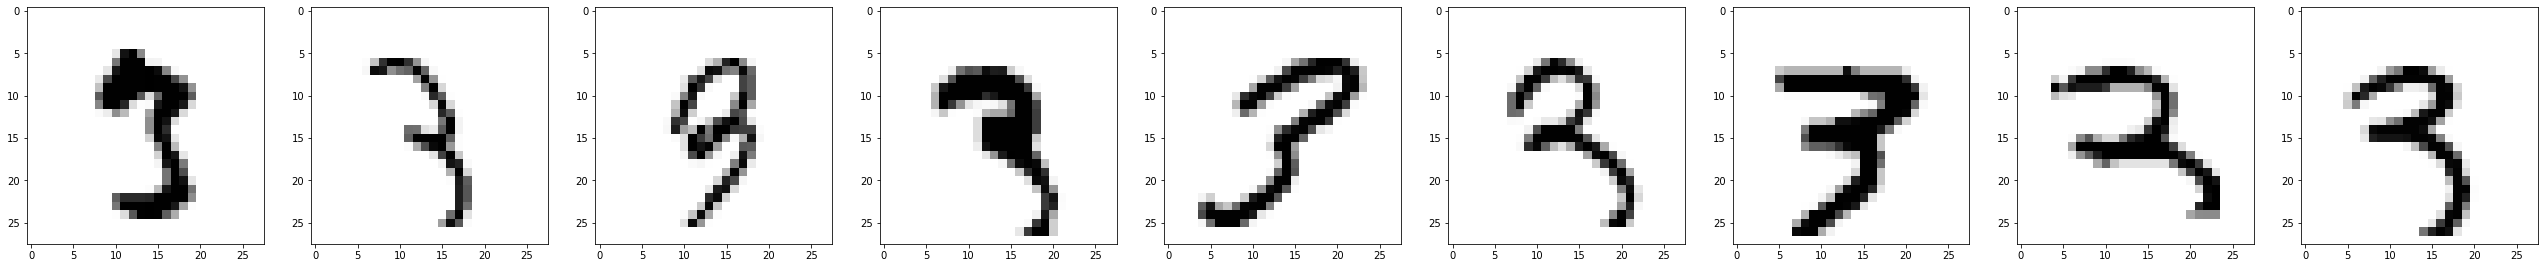

4 9 19


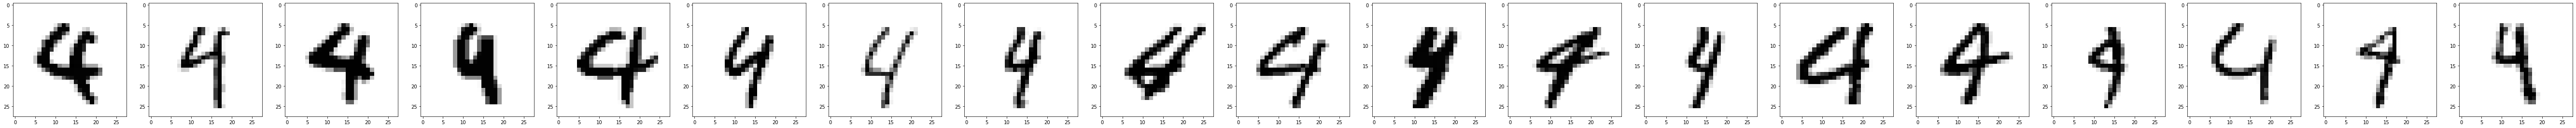

5 3 12


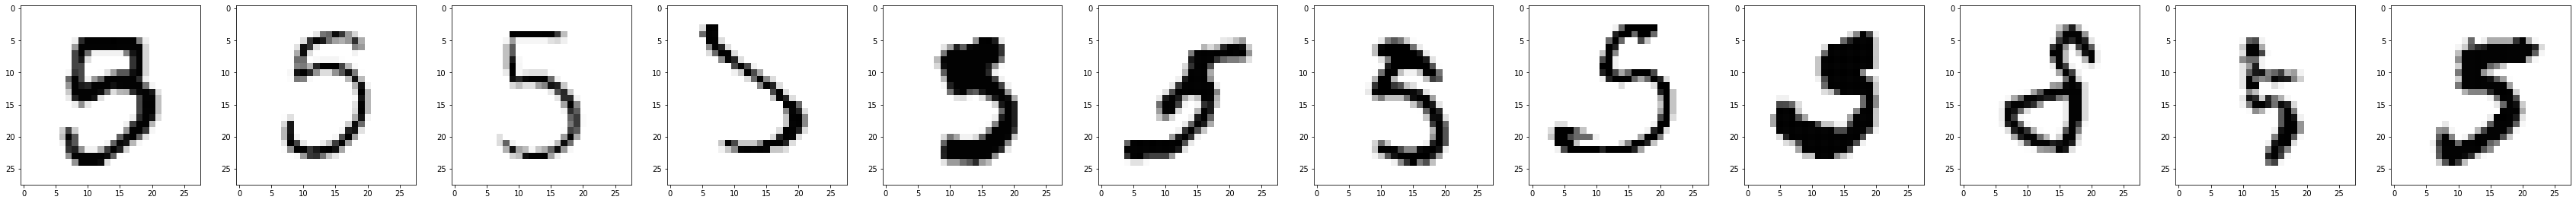

5 6 12


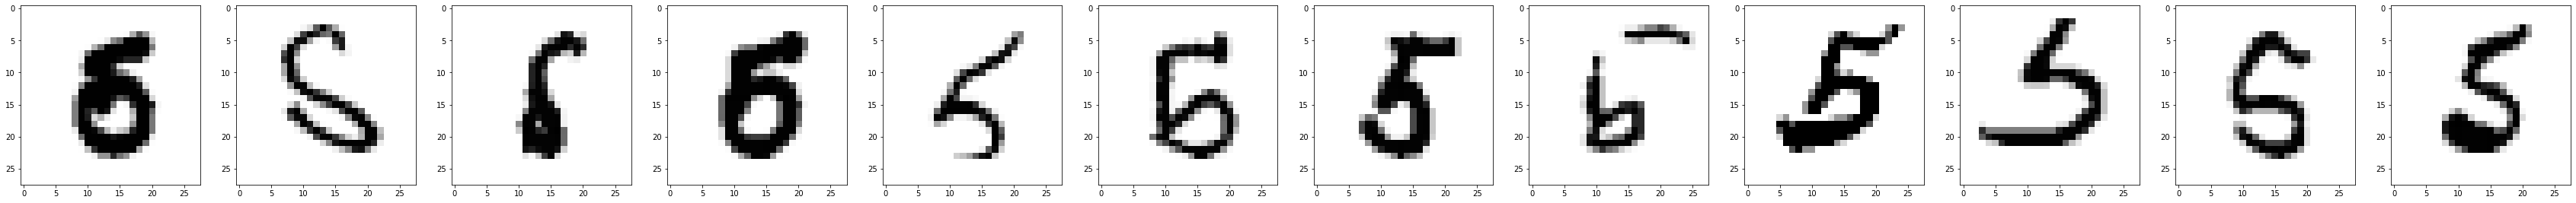

7 1 9


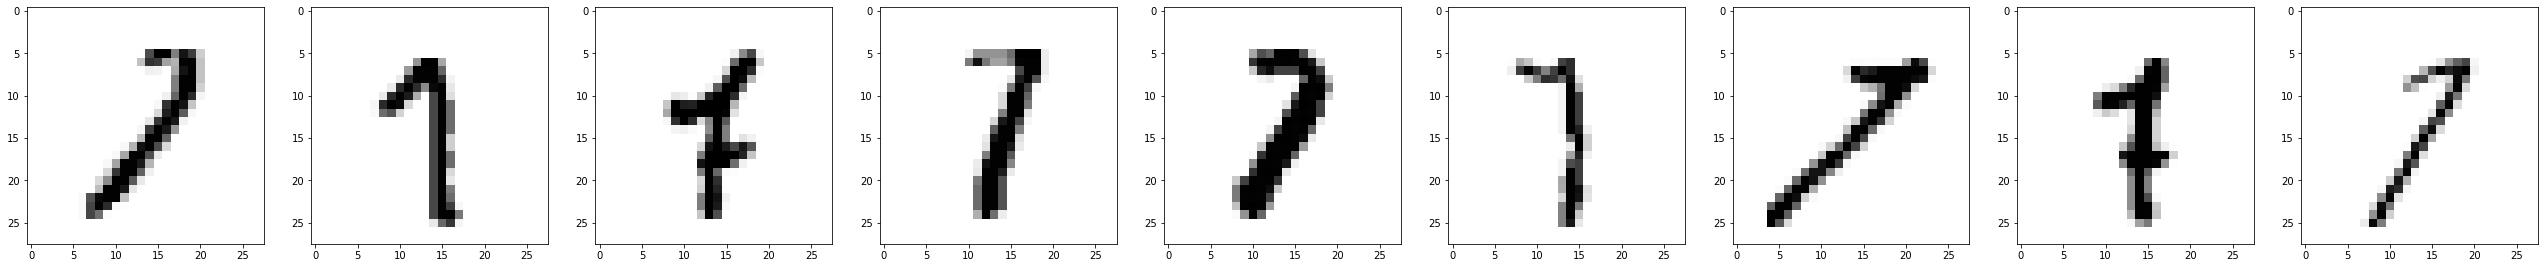

7 9 6


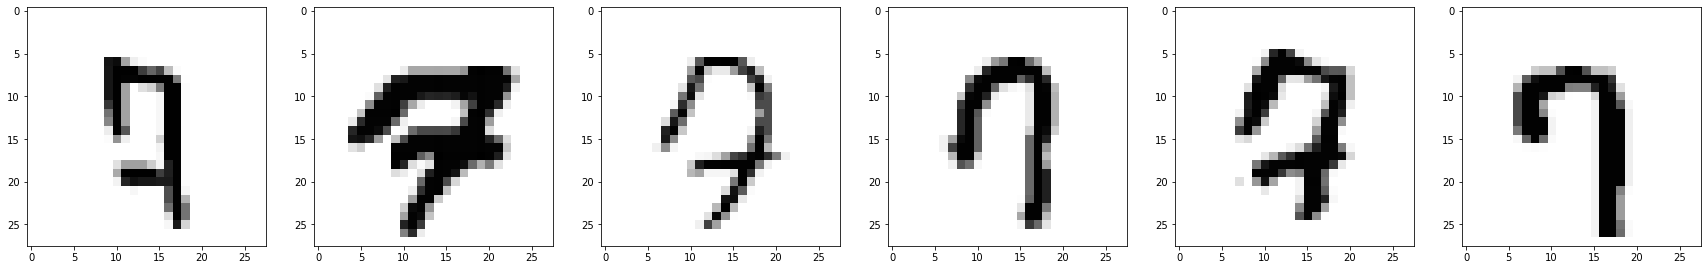

8 1 8


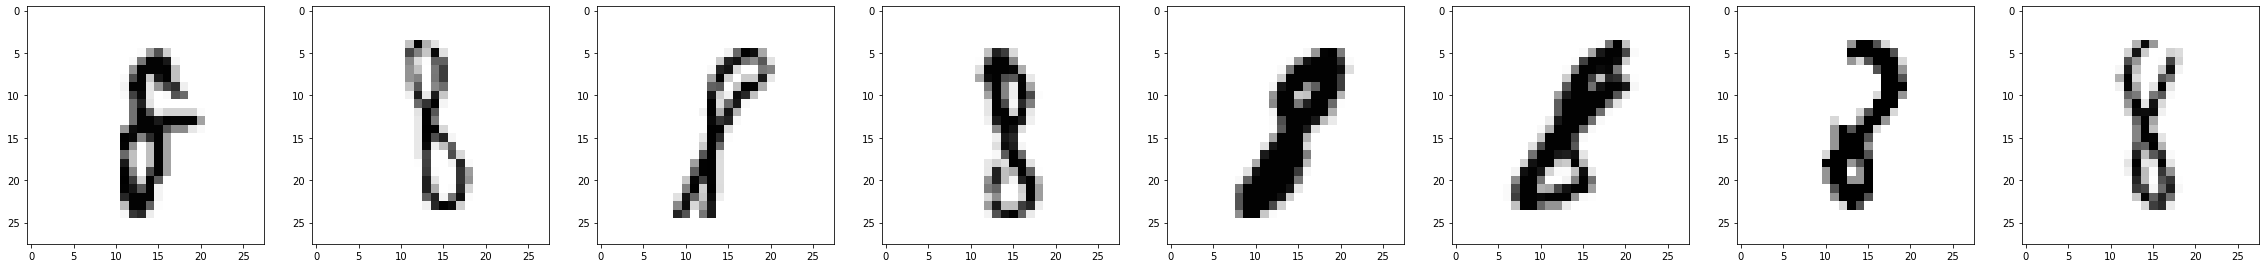

8 3 12


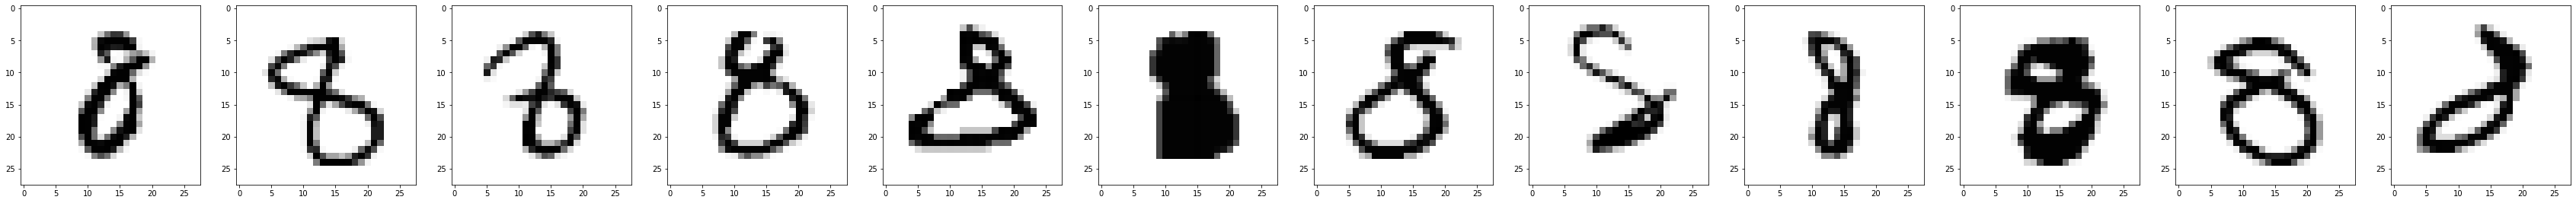

8 7 6


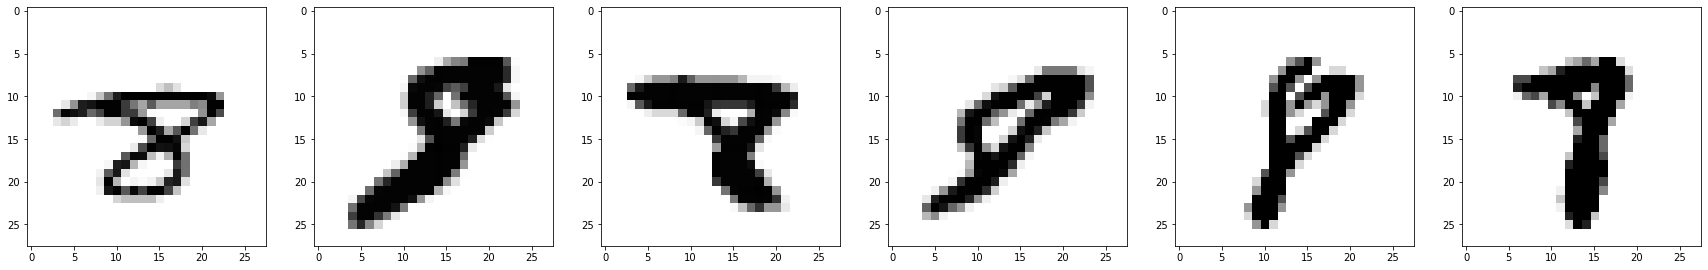

8 9 6


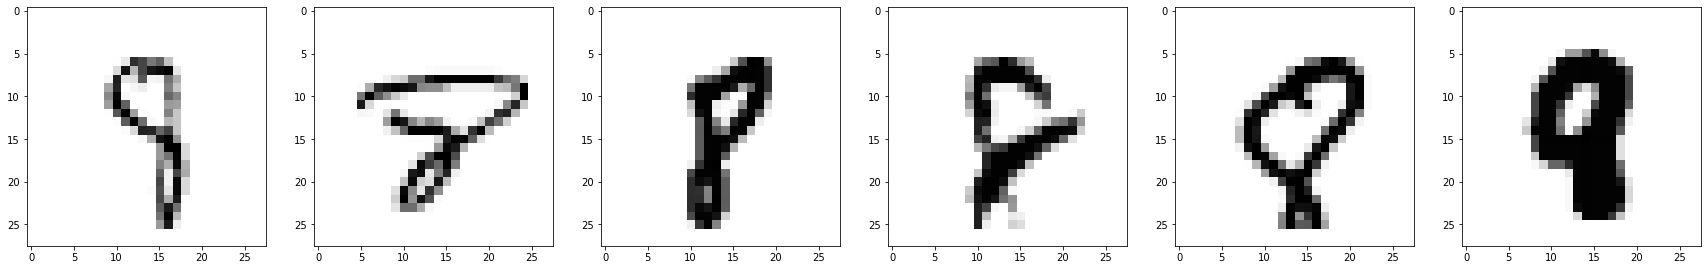

9 0 5


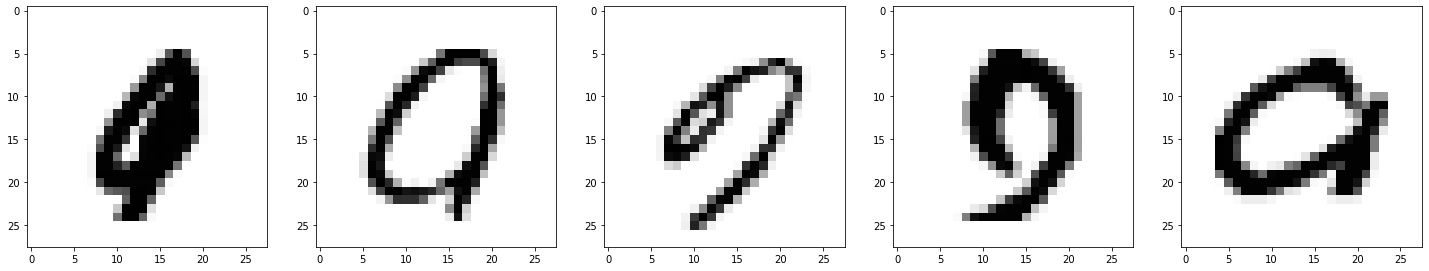

9 3 6


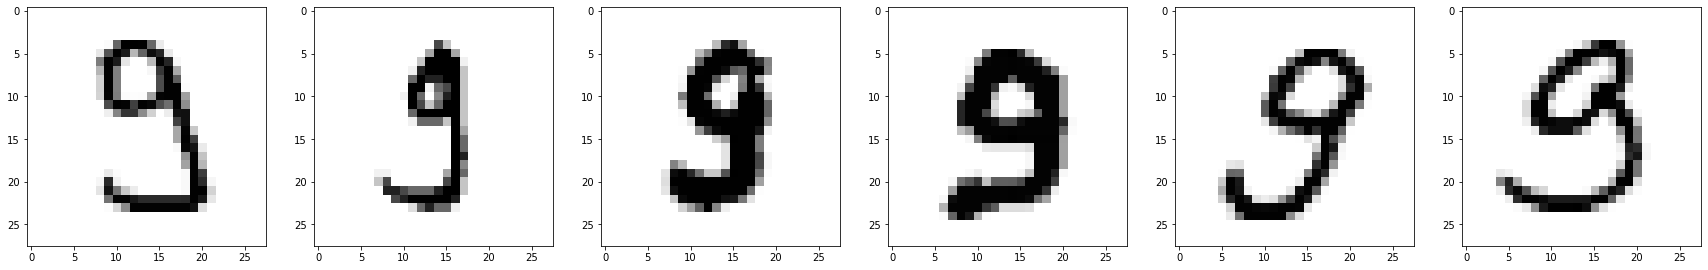

9 4 8


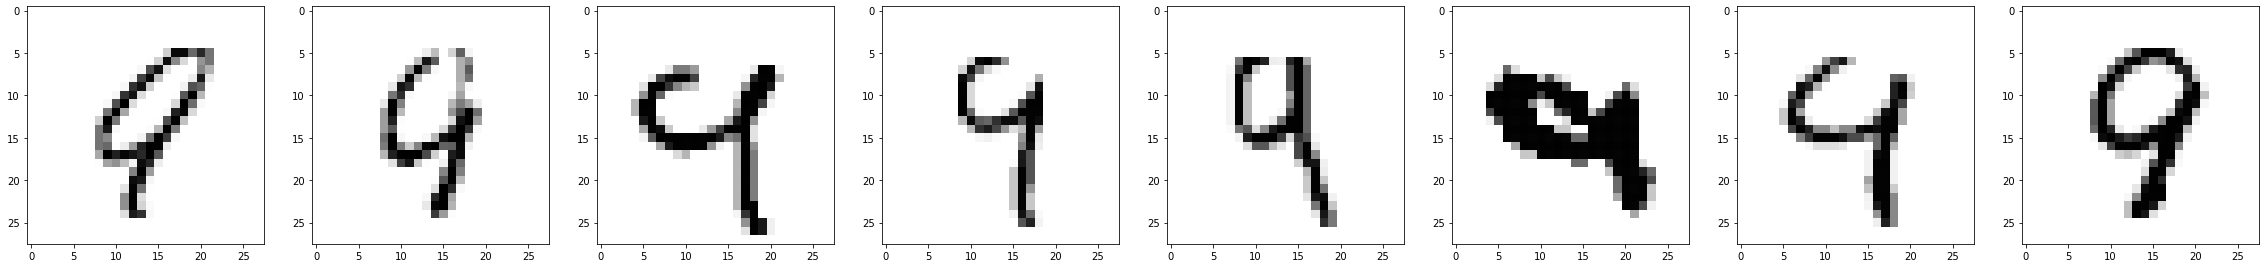

9 7 5


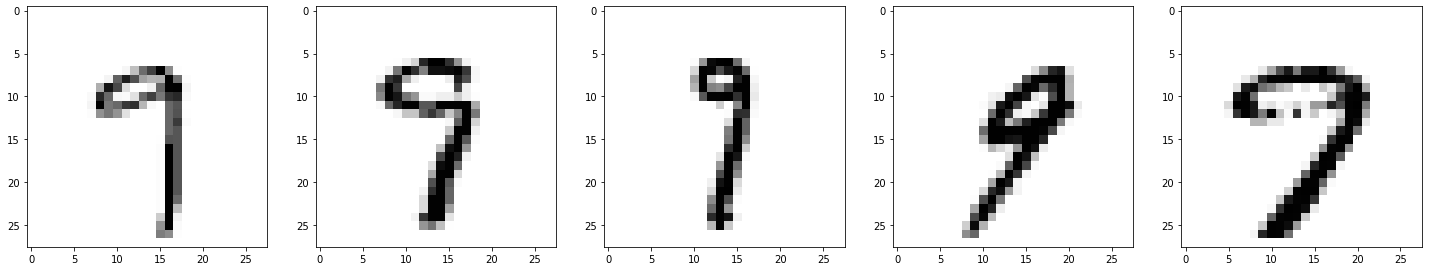

In [109]:
lim = 5
for i in range(10):
    for j in range(10):
        if(i == j):
            continue
        ind = np.where((y_test == i) & (y_pred == j))[0]
        if(ind.size >= lim):
            fig, ax = plt.subplots(1,ind.size,figsize=(ind.size*5,5))
            print(i, j, ind.size)
            for k,index in enumerate(ind):
                ax[k].imshow(X_test[index].reshape(28, 28), cmap="Greys")
            plt.show()

In [117]:
from skimage.filters import gaussian
from skimage.transform import rotate

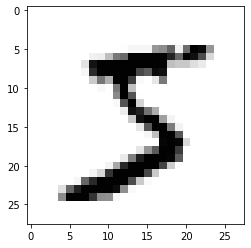

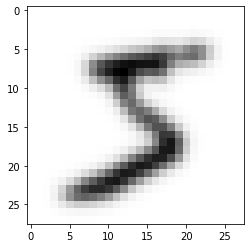

In [118]:
plt.imshow(X[0].reshape(28,28), cmap="Greys")
plt.show()
plt.imshow(gaussian(X[0].reshape(28,28)), cmap="Greys")

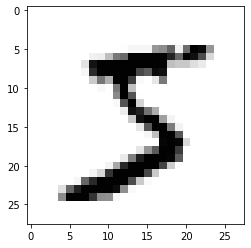

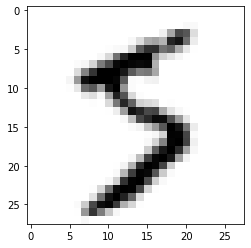

In [140]:
plt.imshow(X[0].reshape(28,28), cmap="Greys")
plt.show()
plt.imshow(rotate(X[0].reshape(28,28),15), cmap="Greys")

In [141]:
from scipy.ndimage import shift

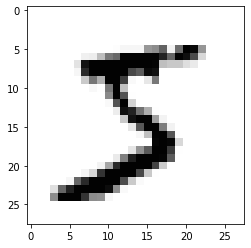

In [148]:
A = shift(X[0].reshape(28,28),shift=(0,-1))
plt.imshow(A, cmap="Greys")